# First program

This is my first program

In [2]:
print('hello woprld')

hello woprld


In [2]:
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd 
import seaborn as sns

C:\Users\PC\AppData\Local\Temp\ipykernel_7824\3526466215.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

C:\Users\PC\AppData\Local\Temp\ipykernel_7824\2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [4]:
#wielkosc bazy danych

df.shape

(7461195, 13)

In [5]:
df2 = df[(df["Event distance/length"].isin(['50km']))   &  (df['Year of event'] == 2019) 
& (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'POL')]


In [6]:
df2.shape

(810, 13)

In [7]:
#remove POL from event name

df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

C:\Users\PC\AppData\Local\Temp\ipykernel_7824\961556408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


In [8]:
df2.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1873698,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,3:57:28 h,Jaroslawska Grupa Bieg...,POL,1987.0,M,M23,12.633,321631
1873699,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,3:58:03 h,*Warszawa,POL,1983.0,M,M35,12.602,227705
1873700,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:04:21 h,*Rzeszow,POL,1987.0,M,M23,12.277,211723
1873701,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:07:03 h,Rzeszowskie Gazele I G...,POL,1986.0,M,M23,12.143,204917
1873702,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,172,4:22:36 h,Asseco Active Team,POL,1982.0,M,M35,11.424,661097


In [9]:
#clean up athlete athlete age

In [10]:
df2['athlete age'] = 2019 - df2['Athlete year of birth']

C:\Users\PC\AppData\Local\Temp\ipykernel_7824\691980035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete age'] = 2019 - df2['Athlete year of birth']


In [11]:
#removing h from athlete performance
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


C:\Users\PC\AppData\Local\Temp\ipykernel_7824\2946046738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [12]:
#removing h from athlete performance

df2['Athlete age category'] = df2['Athlete age category'].replace(['M23', 'W23', 'M35', 'W35','M40','W40','M45', 'W45','M50', 'W50','M55', 'W55','M60', 'W60','M65', 'W65','MU23'],
                 ['23', '23', '35','35','45','45','45','45','50','50','55','55','60','60','65','65','23'])


C:\Users\PC\AppData\Local\Temp\ipykernel_7824\785354258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete age category'] = df2['Athlete age category'].replace(['M23', 'W23', 'M35', 'W35','M40','W40','M45', 'W45','M50', 'W50','M55', 'W55','M60', 'W60','M65', 'W65','MU23'],


In [13]:
#drop columns: Athlete Club, Athlete year of birth
df2 = df2.drop(['Athlete club','Athlete year of birth','Event number of finishers'], axis = 1)

In [14]:
#cleanin null values

df2.isna().sum()

Year of event             0
Event dates               0
Event name                0
Event distance/length     0
Athlete performance       0
Athlete country           0
Athlete gender            0
Athlete age category     93
Athlete average speed     0
Athlete ID                0
athlete age              93
dtype: int64

In [15]:
df2[df2['athlete age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age
2134927,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:27:27,POL,M,NaN,9.162,211747,NaN
2134934,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:44:27,POL,M,NaN,8.71,211777,NaN
2134938,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:54:29,POL,F,NaN,8.463,719088,NaN
2134940,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,5:55:22,POL,M,NaN,8.442,211737,NaN
2134954,2019,22.06.2019,Ultra Przesilenie - Sobotka,50km,6:37:06,POL,M,NaN,7.555,719092,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2437849,2019,06.10.2019,Ultra Silesia Marathon,50km,5:28:06,POL,M,NaN,9.144,787024,NaN
2437852,2019,06.10.2019,Ultra Silesia Marathon,50km,5:32:26,POL,M,NaN,9.024,787026,NaN
2437858,2019,06.10.2019,Ultra Silesia Marathon,50km,5:42:54,POL,M,NaN,8.749,787029,NaN
2437860,2019,06.10.2019,Ultra Silesia Marathon,50km,5:49:00,POL,M,NaN,8.596,399692,NaN


In [16]:
df2 = df2.dropna()

In [17]:
df2.shape

(717, 11)

In [18]:
#check for dupes
df2[df2.duplicated() == True]


,Year of event,Event dates,Event name,Event distance/length,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age


In [19]:
#reset index

df2.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete age
0,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:57:28,POL,M,23,12.633,321631,32.0
1,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,3:58:03,POL,M,35,12.602,227705,36.0
2,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:04:21,POL,M,23,12.277,211723,32.0
3,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:07:03,POL,M,23,12.143,204917,33.0
4,2019,27.04.2019,Ultramaraton Podkarpacki 50km,50km,4:22:36,POL,M,35,11.424,661097,37.0
...,...,...,...,...,...,...,...,...,...,...,...
712,2019,06.10.2019,Ultra Silesia Marathon,50km,5:41:07,UKR,M,23,8.795,787028,26.0
713,2019,06.10.2019,Ultra Silesia Marathon,50km,5:41:19,POL,M,50,8.789,83807,52.0
714,2019,06.10.2019,Ultra Silesia Marathon,50km,5:47:16,POL,M,35,8.639,787030,40.0
715,2019,06.10.2019,Ultra Silesia Marathon,50km,5:51:22,POL,M,55,8.538,19463,57.0


In [20]:
#fix type

df2.dtypes

Year of event              int64
Event dates               object
Event name                object
Event distance/length     object
Athlete performance       object
Athlete country           object
Athlete gender            object
Athlete age category      object
Athlete average speed     object
Athlete ID                 int64
athlete age              float64
dtype: object

In [21]:
df2['athlete age'] =df2['athlete age'].astype(int)
df2['Athlete average speed'] =df2['Athlete average speed'].astype(float)
df2['Athlete age category'] =df2['Athlete age category'].astype(int)
df2.dtypes

Year of event              int64
Event dates               object
Event name                object
Event distance/length     object
Athlete performance       object
Athlete country           object
Athlete gender            object
Athlete age category       int32
Athlete average speed    float64
Athlete ID                 int64
athlete age                int32
dtype: object

In [22]:
#rename columns
df3 = df2.rename(columns ={
'Year of event': 'year',
'Event dates':'race_day',
'Event distance/length' :'event',  
'Athlete performance':'performance',
})

<Axes: xlabel='Athlete gender', ylabel='Count'>

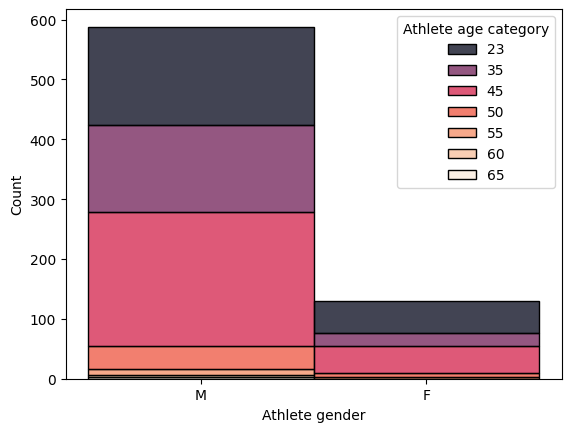

In [23]:


sns.histplot(df3,x ='Athlete gender', hue ='Athlete age category',multiple="stack", palette ='rocket')

<Axes: xlabel='event', ylabel='Athlete average speed'>

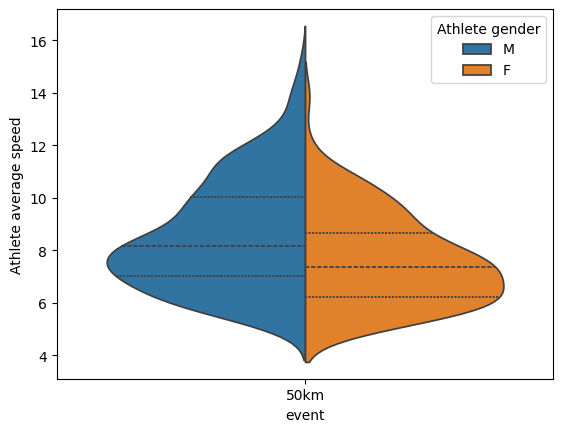

In [24]:
sns.violinplot(data=df3,x='event',y='Athlete average speed', hue ='Athlete gender',split =True, inner ='quartile')

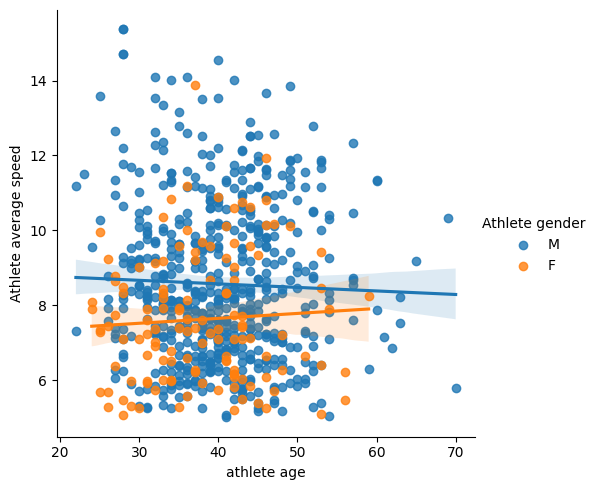

In [25]:
sns.lmplot(data=df3, x ='athlete age', y ='Athlete average speed', hue ='Athlete gender')

In [26]:
df3.groupby(['Athlete gender'])['Athlete average speed'].mean()

Athlete gender
F    7.622093
M    8.570803
Name: Athlete average speed, dtype: float64

In [27]:
df3.groupby('athlete age')['Athlete average speed'].agg(['mean','count']).sort_values('mean',ascending = False).query('count>5')

,mean,count
athlete age,,
49,9.940231,13
57,9.394333,6
28,9.365818,22
46,9.049182,33
25,9.028167,6
53,8.879727,11
32,8.753000,26
44,8.737943,35
30,8.722176,17


In [28]:
df3['race_month']=df3['race_day'].str.split('.').str.get(1).astype(int)

In [29]:
#race season
#is summer slowert than winter?

df3['race_month']= df3['race_day'].str.split('.').str.get(1).astype(int)


In [30]:
df3['race_season'] = df3['race_month'].apply(lambda x:'Winter' if x>11 else 'Fall' if x >8 else 'Summer' if x > 5 else 
                                              'Spring' if x>2 else 'Winter')

In [31]:
df3.groupby('race_season')['Athlete average speed'].agg(['mean','count']).sort_values('mean' ,ascending=False)

,mean,count
race_season,,
Fall,10.825277,177
Summer,8.473313,96
Spring,7.417500,444
